In [ ]:
#created by Landon Brewster and Jack Tran
import kagglehub

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import RFE


#models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Evalutation Models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score


warnings.filterwarnings('ignore')

sns.set()
plt.style.use('ggplot')

# Download latest version
path = kagglehub.dataset_download("nancyalaswad90/breast-cancer-dataset")
print("Path to dataset files:", path)

dataset_path = f"{path}/data.csv"
df = pd.read_csv(dataset_path)

# Preprocessing
df['diagnosis'] = df['diagnosis'].apply(lambda val: 1 if val == 'M' else 0)  # Encode target variable
df.drop('id', axis=1, inplace=True)  # Drop irrelevant columns

# Features and target
X = df.drop('diagnosis', axis=1)  # Features
y = df['diagnosis']  # Target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Feature selection using RFE with Random Forest
model = RandomForestClassifier(random_state=0)  # Base model for RFE
rfe = RFE(model, n_features_to_select=10)  # Select top 10 features
X_selected = rfe.fit_transform(X_scaled, y)

# Get selected feature names
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

# Split the data into training and testing sets using the selected features
X_selected_df = pd.DataFrame(X_selected, columns=selected_features)
X_train, X_test, y_train, y_test = train_test_split(X_selected_df, y, test_size=0.2, random_state=0)

# Example: Check the selected features and shapes
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


100%|██████████| 48.6k/48.6k [00:00<00:00, 42.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/nancyalaswad90/breast-cancer-dataset/versions/4


Selected Features: Index(['perimeter_mean', 'area_mean', 'concavity_mean', 'concave_points_mean',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave_points_worst'],
      dtype='object')
Training set shape: (455, 10)
Testing set shape: (114, 10)


In [ ]:
#KNN model

X_train, X_test, y_train ,y_test =train_test_split(X,y, test_size=0.2, random_state=0)
#takes x and y, splits the rows into training and test sets
#test_size = 0.2 means 20% of the dataset is saved for testing


# scaling data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#ensures no one column is weighed stronger than other data
#called "standardization" -> mean = 0 and sd = 1
#changing range of all columns to be equal

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)#tries to form a mapping to predict y_train based off  X_train
#this is the actual prediction part of this

y_pred = knn.predict(X_test)#apply KNN predicction to var
#this is the testing part of the model

train_accuracy = accuracy_score(y_train, knn.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)

# Perform 5-fold cross-validation on the training data
cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
mean_cv_accuracy = np.mean(cv_scores)

# Print results
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Cross-Validation Accuracy (5-fold): {mean_cv_accuracy:.4f}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training Accuracy: 0.9780
Test Accuracy: 0.9561
Cross-Validation Accuracy (5-fold): 0.9648
[[67  0]
 [ 5 42]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        67
           1       1.00      0.89      0.94        47

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



Optimal k: 5

All Results:
k= 1 | Accuracy=0.9407
k= 2 | Accuracy=0.9473
k= 3 | Accuracy=0.9604
k= 4 | Accuracy=0.9582
k= 5 | Accuracy=0.9604
k= 6 | Accuracy=0.9560
k= 7 | Accuracy=0.9604
k= 8 | Accuracy=0.9538
k= 9 | Accuracy=0.9538
k=10 | Accuracy=0.9538
k=11 | Accuracy=0.9516
k=12 | Accuracy=0.9538
k=13 | Accuracy=0.9582
k=14 | Accuracy=0.9538
k=15 | Accuracy=0.9538
k=16 | Accuracy=0.9538
k=17 | Accuracy=0.9560
k=18 | Accuracy=0.9538
k=19 | Accuracy=0.9538
k=20 | Accuracy=0.9538
k=21 | Accuracy=0.9560
k=22 | Accuracy=0.9560
k=23 | Accuracy=0.9560
k=24 | Accuracy=0.9538
k=25 | Accuracy=0.9538
k=26 | Accuracy=0.9516
k=27 | Accuracy=0.9516
k=28 | Accuracy=0.9516
k=29 | Accuracy=0.9538
k=30 | Accuracy=0.9495
k=31 | Accuracy=0.9451
k=32 | Accuracy=0.9495
k=33 | Accuracy=0.9451
k=34 | Accuracy=0.9429
k=35 | Accuracy=0.9429
k=36 | Accuracy=0.9451
k=37 | Accuracy=0.9473
k=38 | Accuracy=0.9451
k=39 | Accuracy=0.9473
k=40 | Accuracy=0.9473
k=41 | Accuracy=0.9473
k=42 | Accuracy=0.9473
k=43 | 

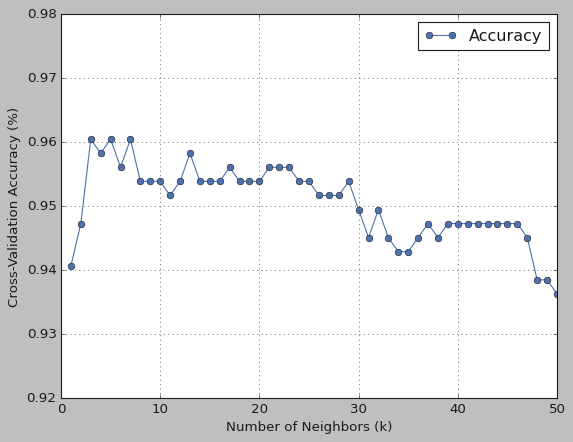

In [ ]:
#KNN -> K neighbors
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Initialize variables to store results
results = []  # To store (k, accuracy, precision, recall, f1-score)

# Iterate over k values from 1 to 20
for k in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=k)

    # Cross-validate accuracy, precision, recall, F1-score
    accuracy = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy').mean()
    # precision = precision_score(y_test, y_pred, average='binary')  # Use binary for 2-class problems
    # recall = recall_score(y_test, y_pred, average='binary')
    # f1 = f1_score(y_test, y_pred, average='binary')

    # Append the metrics to the results list
    results.append((k, accuracy))

    # Print the metrics for this k
    #print(f"k={k:2d} | Accuracy={accuracy:.4f} | Precision={precision:.4f} | Recall={recall:.4f} | F1-Score={f1:.4f}")

best_k = max(results, key=lambda x: x[1])[0]
print(f"Optimal k: {best_k}")

# Print all results
print("\nAll Results:")
for result in results:
    print(f"k={result[0]:2d} | Accuracy={result[1]:.4f}")


# Plot accuracy vs. k
k_values = [result[0] for result in results]
accuracies = [result[1] for result in results]

plt.style.use('classic')
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b', label='Accuracy')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Cross-Validation Accuracy (%)")
plt.ylim(.92,.98)
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
#RandomForest

X_train, X_test, y_train ,y_test =train_test_split(X,y, test_size=0.2, random_state=42)
#takes x and y, splits the rows into training and test sets
#test_size = 0.2 means 20% of the dataset is saved for testing


# scaling data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#ensures no one column is weighed stronger than other data
#called "standardization"
#changing range of all columns to be equal


rand_clf = RandomForestClassifier(
    criterion='entropy',
    max_depth=6,
    max_features=0.5,
    min_samples_leaf=2,
    min_samples_split=3,
    n_estimators=211,
    random_state=42
)
rand_clf.fit(X_train, y_train)

y_pred = rand_clf.predict(X_test)

train_accuracy = accuracy_score(y_train, rand_clf.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)

# Cross-validation accuracy
cv_scores = cross_val_score(rand_clf, X_train, y_train, cv=5, scoring='accuracy')
cv_accuracy = cv_scores.mean()

# Print metrics
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Cross-Validation Accuracy (5-fold): {cv_accuracy:.4f}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training Accuracy: 0.9956
Test Accuracy: 0.9649
Cross-Validation Accuracy (5-fold): 0.9626
[[70  1]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



Optimal Maximum Depth: 6
max_depth= 1 |Accuracy=0.9165
max_depth= 6 |Accuracy=0.9582
max_depth=11 |Accuracy=0.9582
max_depth=16 |Accuracy=0.9582
max_depth=21 |Accuracy=0.9582
max_depth=26 |Accuracy=0.9582


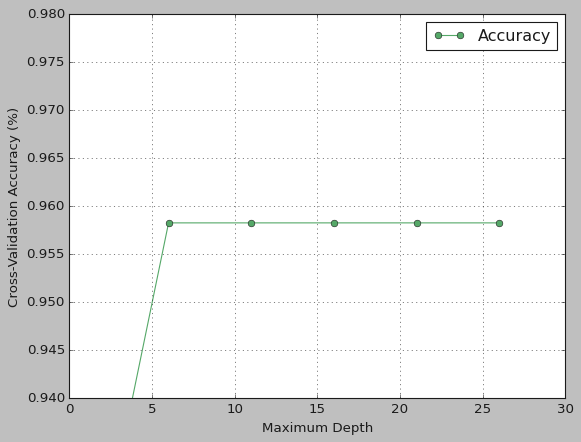

In [ ]:
# RF -> tree depth

# Use a fixed value for n_estimators
n_estimators_fixed = 130

# Optimize Maximum Depth
# max_depth_range = range(5, 21, 5)  # Maximum depth: 5, 10, 15, 20
results_max_depth = []

for max_depth in range (1,31,5):
    rand_clf = RandomForestClassifier(
        criterion='entropy',
        max_depth=max_depth,
        max_features=0.5,
        min_samples_leaf=2,
        min_samples_split=3,
        n_estimators=n_estimators_fixed,  # Fixed number of trees
        random_state=42
    )

    # Perform 5-fold cross-validation
    cv_accuracy = cross_val_score(rand_clf, X_train, y_train, cv=5, scoring='accuracy').mean()
    results_max_depth.append((max_depth, cv_accuracy))

# Find the best maximum depth
best_max_depth = max(results_max_depth, key=lambda x: x[1])[0]
print(f"Optimal Maximum Depth: {best_max_depth}")

for result in results_max_depth:
    print(f"max_depth={result[0]:2d} |Accuracy={result[1]:.4f}")

# Plot results
max_depth_values = [result[0] for result in results_max_depth]
accuracies = [result[1] for result in results_max_depth]

plt.style.use('classic')
plt.plot(max_depth_values, accuracies, marker='o', linestyle='-', color='g', label='Accuracy')
#plt.title("Cross-Validation Accuracy vs. Maximum Depth")
plt.xlabel("Maximum Depth")
plt.ylabel("Cross-Validation Accuracy (%)")
plt.ylim(0.94, .98)  # Adjust y-axis for better visualization
plt.grid(True)
plt.legend()
plt.show()

Optimal Number of Trees: 211
n_estimators=  1 | Accuracy=0.9231
n_estimators= 11 | Accuracy=0.9560
n_estimators= 21 | Accuracy=0.9538
n_estimators= 31 | Accuracy=0.9516
n_estimators= 41 | Accuracy=0.9560
n_estimators= 51 | Accuracy=0.9560
n_estimators= 61 | Accuracy=0.9538
n_estimators= 71 | Accuracy=0.9582
n_estimators= 81 | Accuracy=0.9560
n_estimators= 91 | Accuracy=0.9582
n_estimators=101 | Accuracy=0.9582
n_estimators=111 | Accuracy=0.9582
n_estimators=121 | Accuracy=0.9582
n_estimators=131 | Accuracy=0.9582
n_estimators=141 | Accuracy=0.9582
n_estimators=151 | Accuracy=0.9604
n_estimators=161 | Accuracy=0.9604
n_estimators=171 | Accuracy=0.9604
n_estimators=181 | Accuracy=0.9604
n_estimators=191 | Accuracy=0.9604
n_estimators=201 | Accuracy=0.9604
n_estimators=211 | Accuracy=0.9626
n_estimators=221 | Accuracy=0.9604
n_estimators=231 | Accuracy=0.9604
n_estimators=241 | Accuracy=0.9604


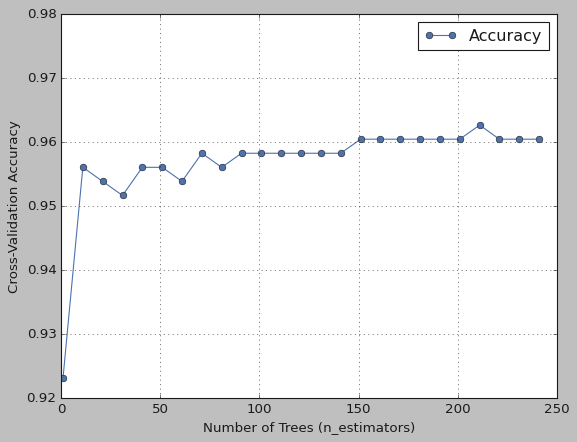

In [ ]:
# Define range for n_estimators (number of trees)
n_estimators_range = range(1, 251, 10)  # Test 50, 100, 150, 200, 250
results_n_estimators = []
# Iterate over n_estimators values
for n_estimators in n_estimators_range:
    rand_clf = RandomForestClassifier(
        criterion='entropy',
        max_depth=10,  # Keep max_depth fixed
        max_features=0.5,
        min_samples_leaf=2,
        min_samples_split=3,
        n_estimators=n_estimators,  # Number of trees to test
        random_state=42
    )

    # Perform 5-fold cross-validation
    cv_accuracy = cross_val_score(rand_clf, X_train, y_train, cv=5, scoring='accuracy').mean()
    results_n_estimators.append((n_estimators, cv_accuracy))

# Find the best number of trees
best_n_estimators = max(results_n_estimators, key=lambda x: x[1])[0]
print(f"Optimal Number of Trees: {best_n_estimators}")

for result in results_n_estimators:
    print(f"n_estimators={result[0]:3d} | Accuracy={result[1]:.4f}")

# Plot results
n_estimators_values = [result[0] for result in results_n_estimators]
accuracies = [result[1] for result in results_n_estimators]

plt.style.use('classic')
plt.plot(n_estimators_values, accuracies, marker='o', linestyle='-', color='b', label='Accuracy')
#plt.title("Cross-Validation Accuracy vs. Number of Trees")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Cross-Validation Accuracy")
plt.ylim(0.92, .98)  # Adjust y-axis for better visualization
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
#Neural Network

X_train, X_test, y_train ,y_test = train_test_split(X,y, test_size=0.2, random_state=42)
#takes x and y, splits the rows into training and test sets
#test_size = 0.2 means 20% of the dataset is saved for testing


# scaling data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#ensures no one column is weighed stronger than other data
#called "standardization"
#changing range of all columns to be equal

NN = MLPClassifier(
    hidden_layer_sizes=(11,),  # One hidden layer with 100 neurons
    activation='relu',          # 'relu' activation function
    solver='adam',              # 'adam' solver for weight optimization
    max_iter=500,               # Set the number of iterations (epochs)
    random_state=42             # Set the seed for reproducibility
)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(NN, X_train, y_train, cv=5, scoring='accuracy')
cv_mean_accuracy = cv_scores.mean()
print(f"Cross-Validation Accuracy (5-fold): {cv_mean_accuracy:.4f}")

#fit the model
NN.fit(X_train, y_train)
# Predictions and evaluation on the test set
y_pred = NN.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print results
print(f"Training Accuracy: {accuracy_score(y_train, NN.predict(X_train)):.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Cross-Validation Accuracy (5-fold): 0.9780
Training Accuracy: 0.9934
Test Accuracy: 0.9825
Mean Squared Error: 0.0175
Confusion Matrix:
[[71  0]
 [ 2 41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



hidden_neurons=  1 | Accuracy=0.6286
hidden_neurons=  6 | Accuracy=0.9758
hidden_neurons= 11 | Accuracy=0.9780
hidden_neurons= 16 | Accuracy=0.9780
hidden_neurons= 21 | Accuracy=0.9758
hidden_neurons= 26 | Accuracy=0.9758
hidden_neurons= 31 | Accuracy=0.9714
hidden_neurons= 36 | Accuracy=0.9780
hidden_neurons= 41 | Accuracy=0.9758
hidden_neurons= 46 | Accuracy=0.9802
hidden_neurons= 51 | Accuracy=0.9758
hidden_neurons= 56 | Accuracy=0.9802
hidden_neurons= 61 | Accuracy=0.9714
hidden_neurons= 66 | Accuracy=0.9802


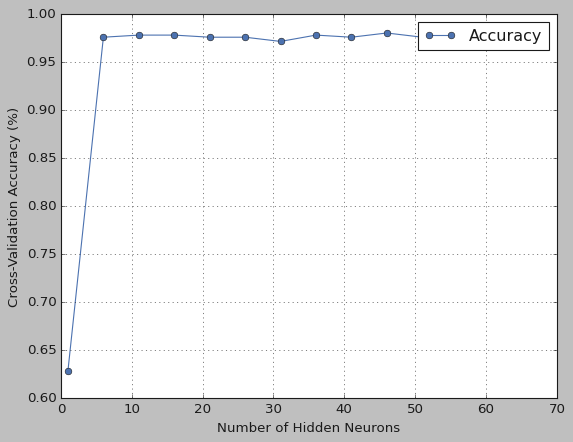

Optimal Number of Hidden Neurons: 46
Test Accuracy with Optimal Hidden Neurons: 0.9737
Confusion Matrix:
[[70  1]
 [ 2 41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
#Neural Network -> number of neurons per layer

X_train, X_test, y_train ,y_test = train_test_split(X,y, test_size=0.2, random_state=42)
#takes x and y, splits the rows into training and test sets
#test_size = 0.2 means 20% of the dataset is saved for testing


# scaling data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#ensures no one column is weighed stronger than other data
#called "standardization"
#changing range of all columns to be equal

# Range of hidden neurons to test
hidden_neurons_range = range(1,70,5)
results_hidden_neurons = []

# Iterate over the range of hidden neurons
for hidden_neurons in hidden_neurons_range:
    NN = MLPClassifier(
        hidden_layer_sizes=(hidden_neurons,),  # One hidden layer with varying neurons
        activation='relu',                    # 'relu' activation function
        solver='adam',                        # 'adam' solver for weight optimization
        max_iter=500,                         # Set the number of iterations (epochs)
        random_state=42                       # Set the seed for reproducibility
    )

    # Perform 5-fold cross-validation
    cv_accuracy = cross_val_score(NN, X_train, y_train, cv=5, scoring='accuracy').mean()
    results_hidden_neurons.append((hidden_neurons, cv_accuracy))

for result in results_hidden_neurons:
    print(f"hidden_neurons={result[0]:3d} | Accuracy={result[1]:.4f}")

# Plot results
hidden_neurons_values = [result[0] for result in results_hidden_neurons]
accuracies = [result[1] for result in results_hidden_neurons]

plt.style.use('classic')
plt.plot(hidden_neurons_values, accuracies, marker='o', linestyle='-', color='b', label='Accuracy')
#plt.title("Cross-Validation Accuracy vs. Number of Hidden Neurons")
plt.xlabel("Number of Hidden Neurons")
plt.ylabel("Cross-Validation Accuracy (%)")
plt.grid(True)
plt.legend()
plt.show()

# Find the best number of hidden neurons
best_hidden_neurons = max(results_hidden_neurons, key=lambda x: x[1])[0]
print(f"Optimal Number of Hidden Neurons: {best_hidden_neurons}")

# Train and evaluate the model with the optimal number of hidden neurons
NN = MLPClassifier(
    hidden_layer_sizes=(best_hidden_neurons,),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)
NN.fit(X_train, y_train)
y_pred = NN.predict(X_test)

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy with Optimal Hidden Neurons: {test_accuracy:.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))



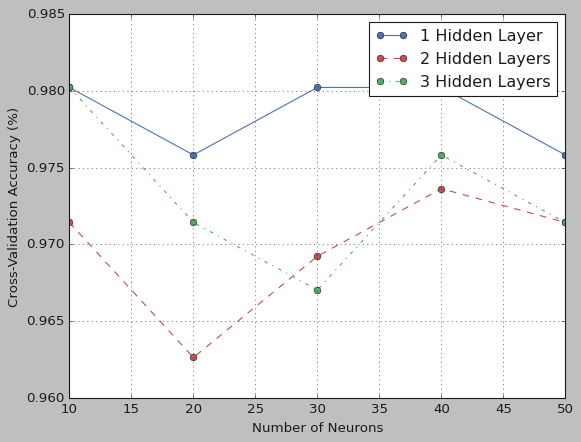

In [ ]:
# Neural Network Comparison: 1 vs 2 Hidden Layers

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Splits the dataset into training and testing sets

# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Range of hidden neurons to test
hidden_neurons_range = range(10, 51, 10)  # Test for 10 to 50 neurons
results_1_layer = []
results_2_layers = []
results_3_layers = []


# Single Hidden Layer
for hidden_neurons in hidden_neurons_range:
    NN = MLPClassifier(
        hidden_layer_sizes=(hidden_neurons,),  # One hidden layer
        activation='relu',
        solver='adam',
        max_iter=500,
        random_state=42
    )
    # Perform 5-fold cross-validation
    cv_accuracy = cross_val_score(NN, X_train, y_train, cv=5, scoring='accuracy').mean()
    results_1_layer.append((hidden_neurons, cv_accuracy))


# Two Hidden Layers
for hidden_neurons in hidden_neurons_range:
    NN = MLPClassifier(
        hidden_layer_sizes=(hidden_neurons, hidden_neurons),  # Two hidden layers
        activation='relu',
        solver='adam',
        max_iter=500,
        random_state=42
    )
    # Perform 5-fold cross-validation
    cv_accuracy = cross_val_score(NN, X_train, y_train, cv=5, scoring='accuracy').mean()
    results_2_layers.append((hidden_neurons, cv_accuracy))

# Three Hidden Layers
for hidden_neurons in hidden_neurons_range:
    NN = MLPClassifier(
        hidden_layer_sizes=(hidden_neurons, hidden_neurons, hidden_neurons),  # Three hidden layers
        activation='relu',
        solver='adam',
        max_iter=500,
        random_state=42
    )
    # Perform 5-fold cross-validation
    cv_accuracy = cross_val_score(NN, X_train, y_train, cv=5, scoring='accuracy').mean()
    results_3_layers.append((hidden_neurons, cv_accuracy))

# Plot Comparison
hidden_neurons_values = [result[0] for result in results_1_layer]
accuracies_1_layer = [result[1] for result in results_1_layer]
accuracies_2_layers = [result[1] for result in results_2_layers]
accuracies_3_layers = [result[1] for result in results_3_layers]

plt.style.use('classic')
plt.plot(hidden_neurons_values, accuracies_1_layer, marker='o', linestyle='-', color='b', label='1 Hidden Layer')
plt.plot(hidden_neurons_values, accuracies_2_layers, marker='o', linestyle='--', color='r', label='2 Hidden Layers')
plt.plot(hidden_neurons_values, accuracies_3_layers, marker='o', linestyle='-.', color='g', label='3 Hidden Layers')
#plt.title("Cross-Validation Accuracy: 1 vs. 2 vs. 3 Hidden Layers")
plt.xlabel("Number of Neurons")
plt.ylabel("Cross-Validation Accuracy (%)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#RandomForestFINAL

X_train, X_test, y_train ,y_test =train_test_split(X,y, test_size=0.2, random_state=42)
#takes x and y, splits the rows into training and test sets
#test_size = 0.2 means 20% of the dataset is saved for testing


# scaling data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#ensures no one column is weighed stronger than other data
#called "standardization"
#changing range of all columns to be equal


rand_clf = RandomForestClassifier(
    criterion='entropy',
    max_depth=6,
    max_features=0.5,
    min_samples_leaf=2,
    min_samples_split=3,
    n_estimators=211,
    random_state=42
)
rand_clf.fit(X_train, y_train)

y_pred = rand_clf.predict(X_test)

train_accuracy = accuracy_score(y_train, rand_clf.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)

# Cross-validation accuracy
cv_scores = cross_val_score(rand_clf, X_train, y_train, cv=5, scoring='accuracy')
cv_accuracy = cv_scores.mean()

# Print metrics
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Cross-Validation Accuracy (5-fold): {cv_accuracy:.4f}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training Accuracy: 0.9956
Test Accuracy: 0.9649
Cross-Validation Accuracy (5-fold): 0.9626
[[70  1]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
#Neural Network FINAL

X_train, X_test, y_train ,y_test = train_test_split(X,y, test_size=0.2, random_state=42)
#takes x and y, splits the rows into training and test sets
#test_size = 0.2 means 20% of the dataset is saved for testing


# scaling data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#ensures no one column is weighed stronger than other data
#called "standardization"
#changing range of all columns to be equal

NN = MLPClassifier(
    hidden_layer_sizes=(11,),  # One hidden layer with 11 neurons
    activation='relu',          # 'relu' activation function
    solver='adam',              # 'adam' solver for weight optimization
    max_iter=500,               # Set the number of iterations (epochs)
    random_state=42             # Set the seed for reproducibility
)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(NN, X_train, y_train, cv=5, scoring='accuracy')
cv_mean_accuracy = cv_scores.mean()
print(f"Cross-Validation Accuracy (5-fold): {cv_mean_accuracy:.4f}")

#fit the model
NN.fit(X_train, y_train)
# Predictions and evaluation on the test set
y_pred = NN.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print results
print(f"Training Accuracy: {accuracy_score(y_train, NN.predict(X_train)):.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Cross-Validation Accuracy (5-fold): 0.9780
Training Accuracy: 0.9934
Test Accuracy: 0.9825
Mean Squared Error: 0.0175
Confusion Matrix:
[[71  0]
 [ 2 41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

